This file is no longer focus on how to use pandas to plot each type of graph. Instead, this file discusses about <u>subplot and text-and-arrow annotation</u> together with the practice at the end.

In [1]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8')   # The 'seaborn' style is deprecated

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )
print( f"Matplotlib {mpl.__version__}" )

Python 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
Pandas 2.1.4
NumPy 1.26.4
IPython 7.34.0
Matplotlib 3.7.1


# Dataset preparation

In [2]:
# Air-Quality Dataset from https://github.com/pandas-dev/pandas/blob/main/doc/data/air_quality_no2.csv

# Load
df_air = pd.read_csv('air_quality_no2.csv')

# Convert dtype of the first column from object to datetime
df_air['datetime'] = pd.to_datetime( df_air['datetime'] )

# Preview
df_air.info()
display(df_air.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         1035 non-null   datetime64[ns]
 1   station_antwerp  95 non-null     float64       
 2   station_paris    1004 non-null   float64       
 3   station_london   969 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 32.5 KB


,datetime,station_antwerp,station_paris,station_london
0,2019-05-07 02:00:00,NaN,NaN,23.0
1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2019-05-07 04:00:00,45.0,27.7,19.0
3,2019-05-07 05:00:00,NaN,50.4,16.0
4,2019-05-07 06:00:00,NaN,61.9,NaN


# 1. Subplot

## 1.1 Pandas's .plot()

In pandas's `.plot()`, there is a `subplots` parameter that allows us to group columns in the given dataframe into subplots.
- If `subplots=False` (default), no subplot will be used.
- If `subplots=True`, a separate subplot will be created for each column of the dataframe.
- <font color=green>(New in pandas 1.5.0)</font> If `subplots` is a sequence of column labels, a subplot will be created for each group of columns.
  - For example, `subplots=[('a', 'c'), ('b', 'd')]` will create 2 subplots: one with columns 'a' and 'c', and one with columns 'b' and 'd'. Remaining columns that aren’t specified (if any) will be plotted in additional subplots (one per column).

<Axes: >

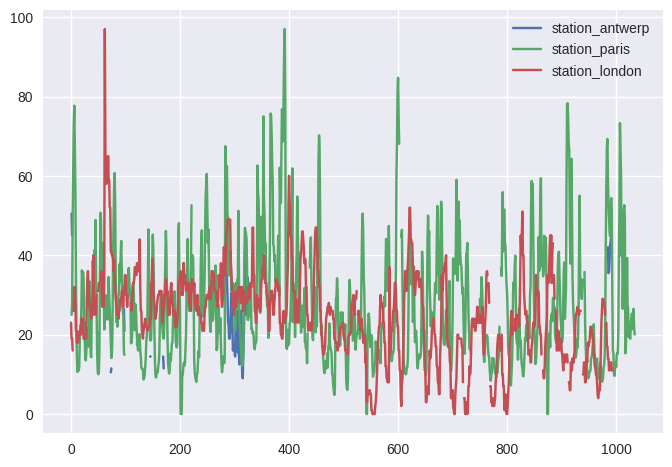

In [3]:
# Use no subplot
df_air.iloc[:,1:].plot( kind='line', subplots=False )  # default:subplots=False

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

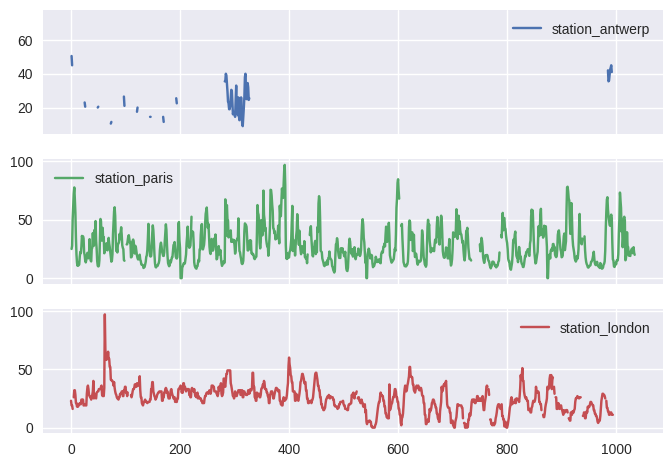

In [4]:
# Plot one column per one subplot
df_air.iloc[:,1:].plot( kind='line', subplots=True )

array([<Axes: >, <Axes: >], dtype=object)

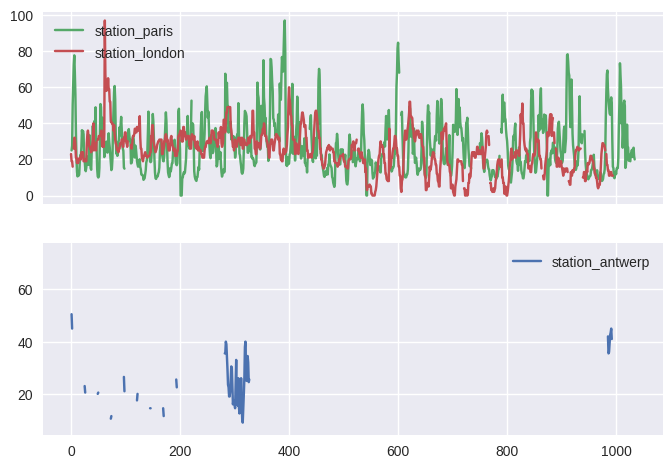

In [5]:
# Plot two subplots for two groups of columns
# This feature requires at least pandas 1.5.0
df_air.iloc[:,1:].plot.line( subplots=[('station_paris','station_london')], )

However, there are situations where you may want to use matplotlib for your subplots. For example,
- In the same figure, you want subplots of different graph types.
- You want to adjust parameters regarding the subplots created by pandas.
- You want something like GridSpec that cannot be set via pandas's `.plot()`.

In these situations, use matplotlib to first create the desired layout/style of subplots. Then, plot into each subplot using pandas's `.plot()`; don't forget to specify the right subplot axis via the `ax` parameter.

## 1.2 Matplotlib's pyplot

Basic subplots with `plt.subplot()` <u>whose subplot indexing starts from 1</u>:

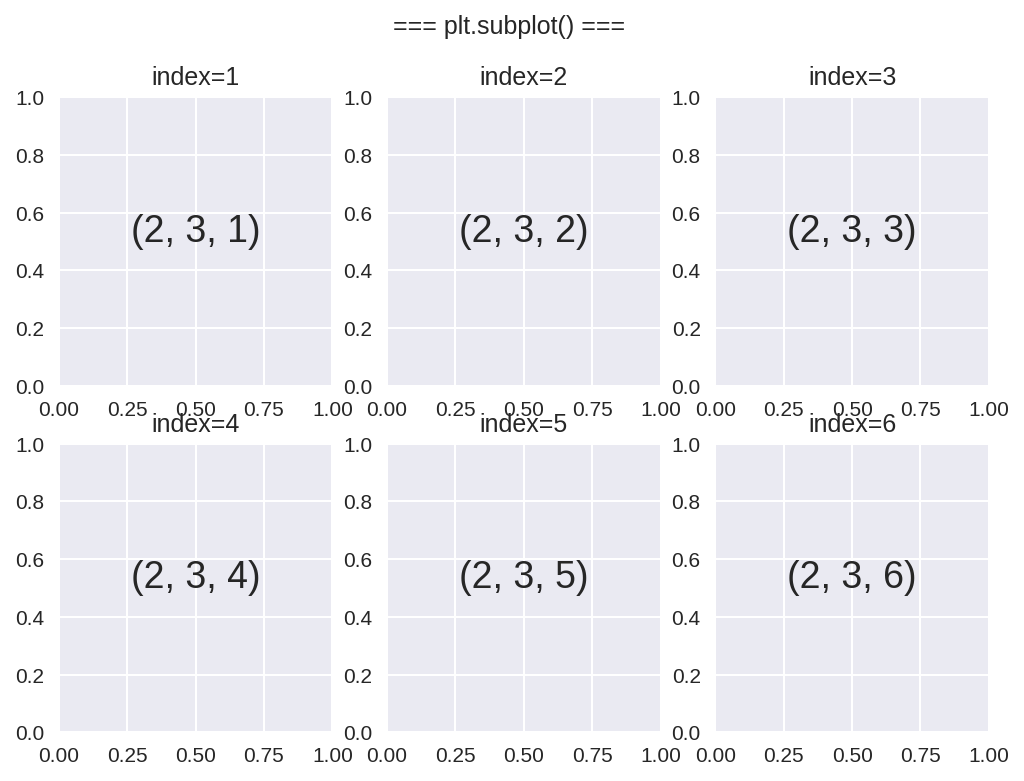

In [6]:
# (Optional) Figure setting
plt.figure(dpi=150)
plt.suptitle('=== plt.subplot() ===')  # Set the title of the figure

'''
Add each subplot to the current figure
|---|---|---|
| 1 | 2 | 3 |
 --- --- ---
| 4 | 5 | 6 |
 --- --- ---
'''
for i in range(1,7):  # There are 6 subplots, indexing as 1, 2, 3, 4, 5, 6
  # Add a new subplot axis to the current figure
  plt.subplot(2,3,i)    # 2 rows, 3 columns, the current subplot is the one with index=i

  # (Optional) Set the title of this subplot
  plt.title(f"index={i}")   # Title of the current subplot

  # Plot
  plt.text(0.5, 0.5, str((2,3,i)), fontsize=18, ha='center')  # Simply draw text to the plot area

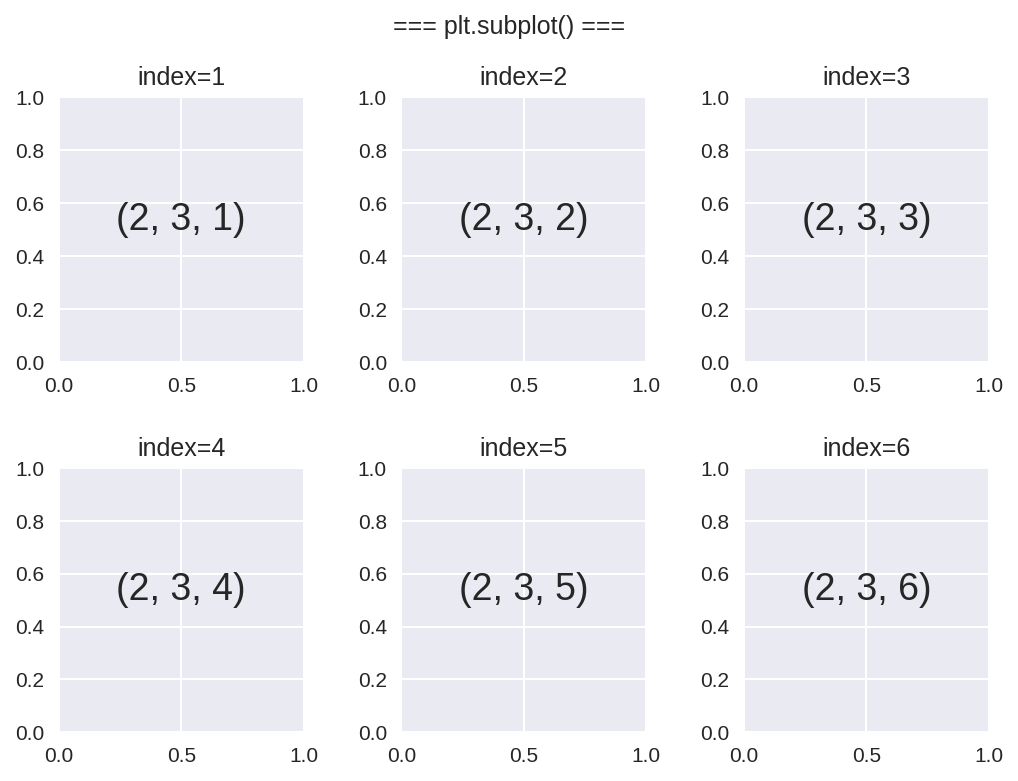

In [7]:
# Same as above but with adjusted spacing

# (Optional) Figure setting
plt.figure(dpi=150)
plt.suptitle('=== plt.subplot() ===')   # Set the title of the figure

# Adjust spacing of the subplot
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Add each subplot to the current figure
for i in range(1,7):  # There are 6 subplots, indexing as 1, 2, 3, 4, 5, 6
  # Add a new subplot axis to the current figure
  plt.subplot(2,3,i)    # 2 rows, 3 columns, the current subplot is the one with index=i

  # (Optional) Set the title of this subplot
  plt.title(f"index={i}")   # Title of the current subplot

  # Plot
  plt.text(0.5, 0.5, str((2,3,i)), fontsize=18, ha='center')  # Simply draw text to the plot area

`plt.subplot()` vs. `plt.subplots()`:
- Instead of creating one axis per one subplot by repeatedly calling `plt.subplot()`, we can create all axes for all subplots in one go using `plt.subplots()`.
- Also, `plt.subplots()` is more consistent with Python's <u>0-based indexing</u>.

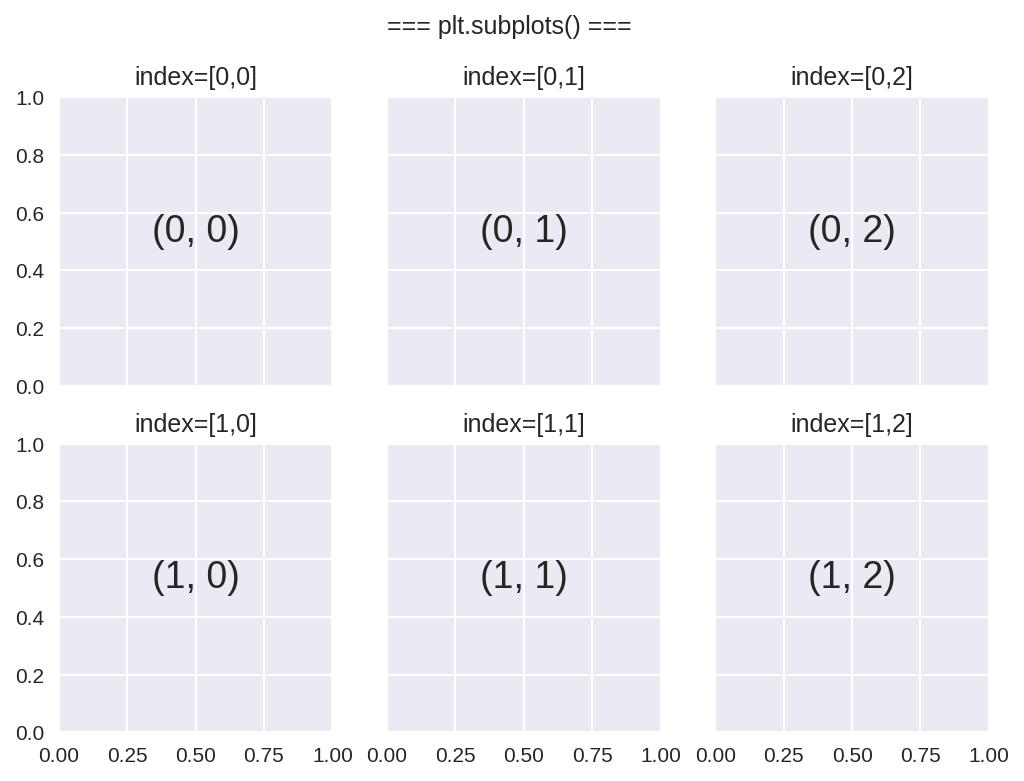

In [8]:
nrows, ncols = 2, 3

# Create axes for all subplots in one go
fig, ax = plt.subplots(nrows, ncols,
                       sharex='col', # Sharing properties among x axes: {'none', 'all', 'row', 'col'}
                                     # 'col' means each subplot column will share an x-axis
                       sharey='row', # Sharing properties among y axes: {'none', 'all', 'row', 'col'}
                                     # 'row' means each subplot row will share a y-axis.
                )

# (Optional) Figure setting
fig.dpi = 150
fig.suptitle('=== plt.subplots() ===')  # Title of the figure

# Loop to plot and style each subplot
for i in range(nrows):   # Iterate on each row (0-based indexing)
  for j in range(ncols): # Iterate on each column (0-based indexing)
    # (Optional) Set title of a particular subplot
    ax[i,j].set_title(f"index=[{i},{j}]")

    # Plot
    ax[i,j].text( 0.5, 0.5, str((i,j)), fontsize=18, ha='center' )

More complicated subplot arrangements with `plt.GridSpec()`:

Text(0.5, 1.0, 'grid[1, 2]')

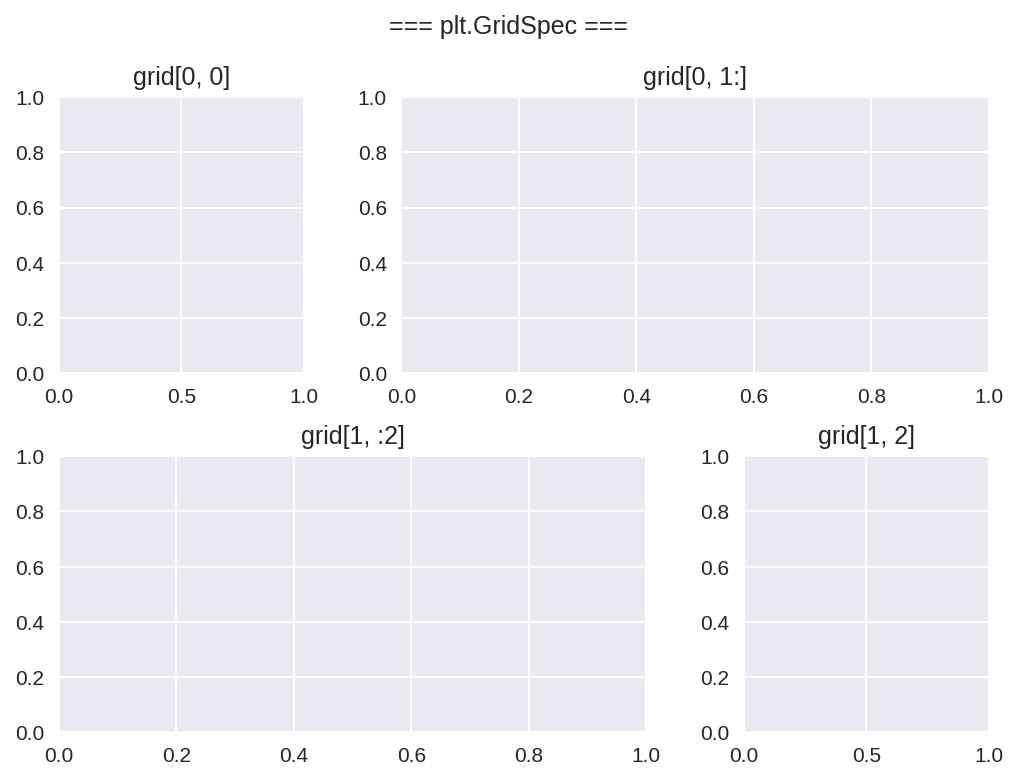

In [9]:
# (Optional) Figure setting
plt.figure(dpi=150)
plt.suptitle('=== plt.GridSpec ===')

'''
GridSpec is an interface that is recognized by plt.subplot()
    0   1   2
  |---|---|---|
0 |   |   |   |
   --- --- ---
1 |   |   |   |
   --- --- ---
'''
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3) # Create a grid of 2 rows and 3 columns

# Add axes to the current figure
### Subplot1
plt.subplot( grid[0, 0] )   # Add the new axis to the grid
plt.title('grid[0, 0]')     # (Optional) Set a title to this subplot
### Subplot2
plt.subplot( grid[0, 1:] )
plt.title('grid[0, 1:]')
### Subplot3
plt.subplot( grid[1, :2] )
plt.title('grid[1, :2]')
### Subplot4
plt.subplot( grid[1, 2] )
plt.title('grid[1, 2]')

Text(0.5, 1.0, 'grid[1, 2]')

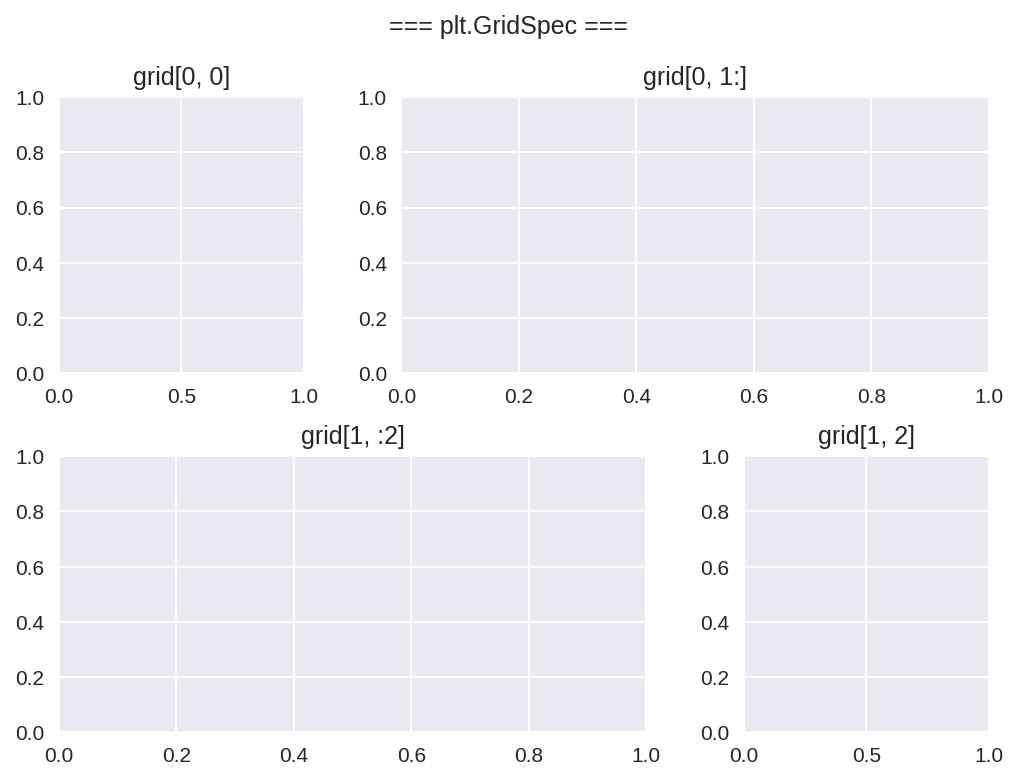

In [10]:
# Same as above but using plt.subplot2grid() to combine the grid construction and the subplot addition

# (Optional) Figure setting
plt.figure(dpi=150)
plt.suptitle('=== plt.GridSpec ===')
plt.subplots_adjust(hspace=0.3, wspace=0.4)

'''
    0   1   2
  |---|---|---|
0 |   |   |   |
   --- --- ---
1 |   |   |   |
   --- --- ---
'''
# Create a subplot at a specific location inside a regular grid
grid_shape = (2,3)
### Subplot1
plt.subplot2grid(shape=grid_shape,  # Number of rows and of columns of the grid
                 loc=(0, 0),        # Row number and column number of the axis location within the grid
                 rowspan=1,         # default=1: Number of rows for the axis to span downwards
                 colspan=1,         # default=1: Number of columns for the axis to span to the right
              )
plt.title('grid[0, 0]')     # (Optional) Set a title to this subplot
### Subplot2
plt.subplot2grid(shape=grid_shape, loc=(0,1), colspan=2)
plt.title('grid[0, 1:]')
### Subplot3
plt.subplot2grid(shape=grid_shape, loc=(1,0), colspan=2 )
plt.title('grid[1, :2]')
### Subplot4
plt.subplot2grid(shape=grid_shape, loc=(1,2))
plt.title('grid[1, 2]')

Use `plt.GridSpec()` for plotting a multi-axes histogram:

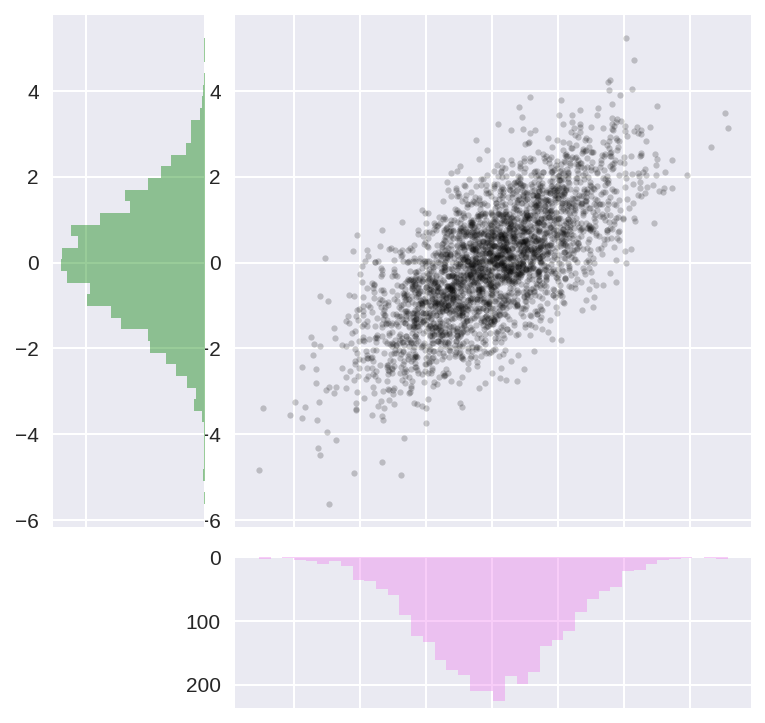

In [11]:
# Prepare data
mean = [0,0]
cov = [[1,1], [1,2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# (Optional) Figure setting
fig = plt.figure(figsize=(6,6), dpi=150)

# Set up the axes with GridSpec
'''
    0   1   2   3
   --- --- --- ---
0 | Y | M | M | M |
   --- --- --- ---
1 | Y | M | M | M |
   --- --- --- ---
2 | Y | M | M | M |
   --- --- --- ---
3 |   | X | X | X |
   --- --- --- ---
'''
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
ax_main = fig.add_subplot( grid[:-1, 1:] )
ax_xhist = fig.add_subplot( grid[-1, 1:], xticklabels=[], sharex=ax_main)
ax_yhist = fig.add_subplot( grid[:-1, 0], xticklabels=[], sharey=ax_main)

# Main plot: Draw a big scatter plot
ax_main.plot(x, y, 'ok', markersize=3, alpha=0.2)

# Bottom plot: attached plot (ax_xhist)
_ = ax_xhist.hist( x, bins=40,
                   histtype='stepfilled', color='violet', alpha=0.4,  # Histogram's style
                   orientation='vertical' )   # Histogram's orientation (default:'vertical')
ax_xhist.invert_yaxis()  # Flip the graph from _/\_ to \/

# Left plot: attached plot (ax_yhist)
_ = ax_yhist.hist( y, bins=40,
                   histtype='stepfilled', color='green', alpha=0.4,  # Histogram's style
                   orientation='horizontal' )  # Histogram's orientation (default:'vertical')
ax_yhist.invert_xaxis()  # Flip the graph from > to <

# 2. Text, label, and annotation

Gallery of examples in https://matplotlib.org/stable/gallery/text_labels_and_annotations/index.html

**EX1:** The first example of text and arrow annotation using matplotlib's pyplot (without using pandas.DataFrame yet)

In [12]:
# Prepare data
x = np.linspace(0, 20, 1000)

# Preview
print(f"type:{type(x)} , shape:{x.shape} , dtype:{x.dtype} , min:{np.min(x)} , max:{np.max(x)}")

type:<class 'numpy.ndarray'> , shape:(1000,) , dtype:float64 , min:0.0 , max:20.0


Text(2, -6, 'local minimum')

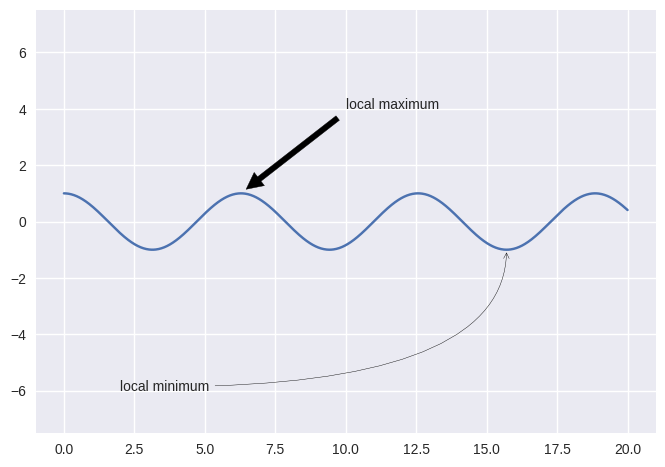

In [13]:
# Plot with annotation

# (Optional) Axis setting
ax = plt.gca()   # Get current axes
ax.axis('equal') # Set equal scaling (i.e., make circles circular) by changing axis limits

# Plot
plt.plot(x, np.cos(x))

# Add annotation
plt.annotate('local maximum', xy=(6.28,1), xytext=(10,4),
             arrowprops=dict(facecolor='black', shrink=0.05) )
plt.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2,-6),
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="angle3,angleA=0,angleB=-90") )

**EX2:** Effect of holidays on US births (annotate the plot drawn by pandas's .plot())

While the plot can be drawn by pandas's `.plot()`, the annotation is done by matplotlib's pyplot.

> The codes in this example are from the book entitled "Python Data Science Handbook: Essential tools for working with data" by Jake VanderPlas.

- Load data

In [14]:
# Load data
df = pd.read_csv('births.csv')

# Preview data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


- Remove all outliers using a robust sigma-clipping operation

In [15]:
# Get the values at percentile 25%, 50%, and 75%
quartiles = np.percentile( df['births'], [25, 50, 75])
print('quartiles', quartiles)

quartiles [4358.  4814.  5289.5]


In [16]:
# Get the median value
mu = quartiles[1]    # Percentile 50%

# A robust estimate of the sample mean, where 0.74 comes from the interquartile range of a Guassian distribution
sig = 0.74 * (quartiles[2] - quartiles[0])
print(f"mu={mu} , sig={sig}")

mu=4814.0 , sig=689.31


In [17]:
# Remove outliers
df = df.query("(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)")
df.loc[: , 'day'] = df.loc[ : , 'day'].astype(int)

# Preview data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 14610 entries, 0 to 15066
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 684.8+ KB


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


- Prepare data for plotting

In [18]:
# Use datetime as row labels
# For 15FEB2012, it will become (2012 * 10000) + (2 * 100) + 15 = 20120215
df.index = pd.to_datetime( (10000 * df.year) + (100 * df.month) + df.day,
                           format='%Y%m%d')

# Preview
print(df.index)
df

DatetimeIndex(['1969-01-01', '1969-01-01', '1969-01-02', '1969-01-02',
               '1969-01-03', '1969-01-03', '1969-01-04', '1969-01-04',
               '1969-01-05', '1969-01-05',
               ...
               '1988-12-27', '1988-12-27', '1988-12-28', '1988-12-28',
               '1988-12-29', '1988-12-29', '1988-12-30', '1988-12-30',
               '1988-12-31', '1988-12-31'],
              dtype='datetime64[ns]', length=14610, freq=None)


,year,month,day,gender,births
1969-01-01,1969,1,1.0,F,4046
1969-01-01,1969,1,1.0,M,4440
1969-01-02,1969,1,2.0,F,4454
1969-01-02,1969,1,2.0,M,4548
1969-01-03,1969,1,3.0,F,4548
...,...,...,...,...,...
1988-12-29,1988,12,29.0,M,5944
1988-12-30,1988,12,30.0,F,5742
1988-12-30,1988,12,30.0,M,6095
1988-12-31,1988,12,31.0,F,4435


In [19]:
# Find the average births over the course of the calendar year
df_by_date = df.pivot_table( index=[df.index.month, df.index.day],
                             columns=None,
                             values='births',
                             aggfunc='mean')

# Preview
df_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [20]:
# Convert the row labels from MultiIndex to datetime index
from datetime import datetime
df_by_date.index = [ datetime(2012, month, day) for (month,day) in df_by_date.index]

# Preview
print(df_by_date.index)
df_by_date.head()

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=366, freq=None)


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


- Plot a line graph without annotation

Text(0, 0.5, 'The average number of births')

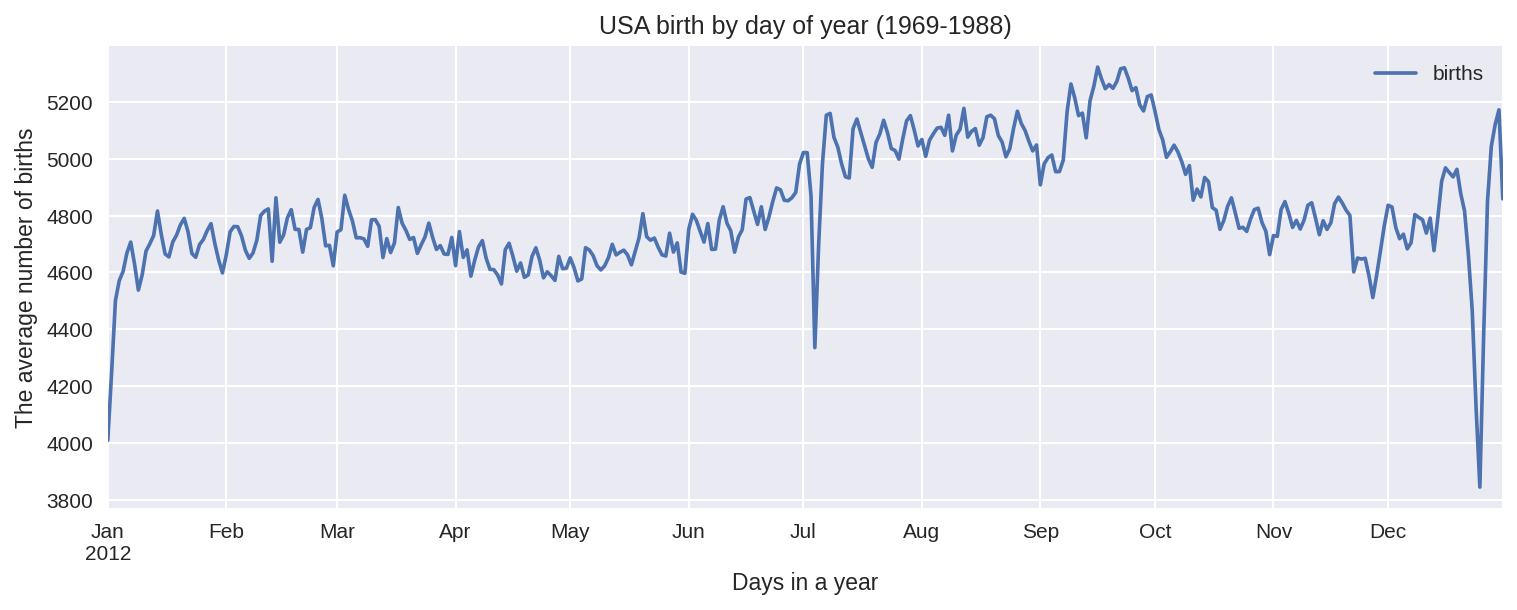

In [21]:
# (Optional) Figure setting
fig, ax = plt.subplots(figsize=(12,4),dpi=150)

# Plot
df_by_date.plot(ax=ax)

# (Optional) Set the graph title
ax.set_title('USA birth by day of year (1969-1988)')

# (Optional) Set labels in both axes
ax.set_xlabel('Days in a year')
ax.set_ylabel('The average number of births')

- Plot a line graph with text and arrow annotation

Text(-30, 0, 'Christmas')

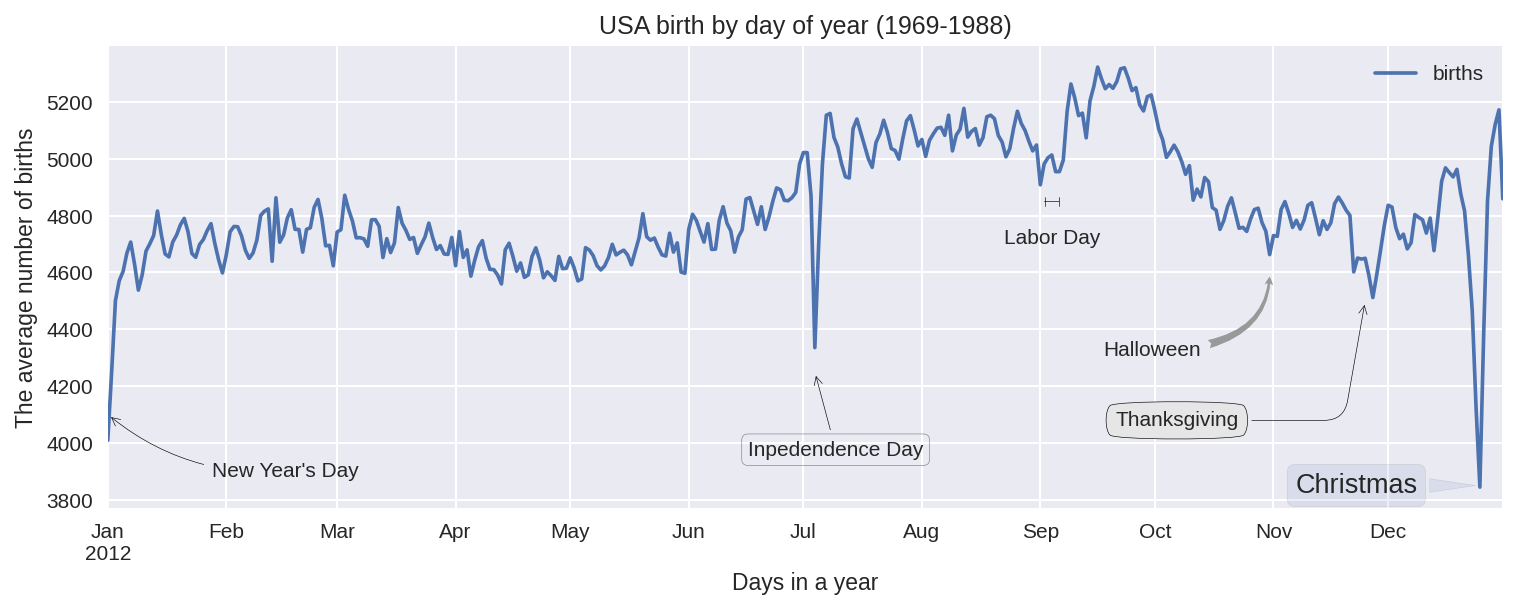

In [22]:
# (Optional) Figure setting
fig, ax = plt.subplots(figsize=(12,4),dpi=150)

# Plot
df_by_date.plot(ax=ax)

# (Optional) Set the graph title
ax.set_title('USA birth by day of year (1969-1988)')

# (Optional) Set labels in both axes
ax.set_xlabel('Days in a year')
ax.set_ylabel('The average number of births')

# Text + arrow
ax.annotate("New Year's Day",
             xy=('2012-1-1', 4100), xycoords='data',
             xytext=(50,-30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))

# Text + arrow + bounding box
ax.annotate("Inpedendence Day",
             xy=('2012-7-4', 4250), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(10,-40), textcoords='offset points', ha='center',
             arrowprops=dict(arrowstyle='->'))

# Text + time-spanning bar
ax.annotate("Labor Day",
             xy=('2012-9-4', 4850), xycoords='data', ha='center',
             xytext=(0,-20), textcoords='offset points')
ax.annotate('',
             xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
             xycoords='data', textcoords='data',
             arrowprops={'arrowstyle':'|-|,widthA=0.2,widthB=0.2'} )

# Text + fancy arrow
ax.annotate('Halloween',
             xy=('2012-10-31', 4600), xycoords='data',
             xytext=(-80,-40), textcoords='offset points',
             arrowprops=dict( arrowstyle='fancy',
                              fc='0.6', ec='none',
                              connectionstyle='angle3,angleA=0,angleB=-90') )

# Text + arrow + round box
ax.annotate('Thanksgiving',
            xy=('2012-11-25',4500), xycoords='data',
            xytext=(-120,-60), textcoords='offset points',
            bbox=dict(boxstyle='round4,pad=.5', fc='0.9'),
            arrowprops=dict( arrowstyle='->',
                             connectionstyle='angle,angleA=0,angleB=80,rad=20') )

# Text + fancy arrow + round box
ax.annotate('Christmas',
            xy=('2012-12-25',3850), xycoords='data',
            xytext=(-30,0), textcoords='offset points',
            size=13, ha='right', va='center',
            bbox=dict(boxstyle='round', alpha=0.1),
            arrowprops=dict( arrowstyle='wedge,tail_width=0.5',
                             alpha=0.1) )

# Practice

Use our old pokemon dataset to do the following data visualization.

1. (1.5 points) Plot the number of each pokemon type.

![Question1](matplotlib3_question1_answer.png)

2. (1.5 points) For pokemons whose type1 is fire, water, or bug, create one figure (with several subplots) to conclude their histograms of hp, attack, and defense.

![Question2](matplotlib3_question2_answer.png)